In [1]:
import numpy as np
import algorithm_analysis as aa
import cec17.functions as cec
import cec17.functions_info as cec_info
import matplotlib.pyplot as plt
from tabulate import tabulate

In [7]:
def analyze_function(function_name, dims, population_size=50, runs=10, max_iterations = 1000):
    print('run cauchy')
    results_c, progress_c, populations_c = aa.analyze_algorithm(function_name, 'cauchy', runs=runs,
                                                                max_iterations=max_iterations,
                                                                population_size=population_size, dims=dims)
        
    print('run normal')
    results_n, progress_n, populations_n = aa.analyze_algorithm(function_name, 'normal', runs=runs,
                                                                max_iterations=max_iterations,
                                                                population_size=population_size, dims=dims)
        
    real_min = cec.get_shift_matrix(cec_info.function_number[function_name], dims) * 0.5
    
    best_individual_c = populations_c[np.argmin(np.linalg.norm(populations_c - real_min, axis=1))]
    best_individual_n = populations_n[np.argmin(np.linalg.norm(populations_n - real_min, axis=1))]
    
    print('Summary')
    print(tabulate([['population size', population_size],
                    ['runs', runs],
                    ['max_iterations', max_iterations]]
                  ))
    
    print('Results')    
    print(tabulate([['min', np.min(results_c), np.min(results_n)],
                    ['max', np.max(results_c), np.max(results_n)],
                    ['mean', np.mean(results_c), np.mean(results_n)],
                    ['median', np.median(results_c), np.median(results_n)],
                    ['std', np.std(results_c), np.std(results_n)]],
                   headers=['', 'cauchy', 'normal']  
                   ))
    
    print('Population')
    print('target individual', real_min)
    if dims == 2:
        print(tabulate([['average individual', np.mean(populations_c, axis=0), np.mean(populations_n, axis=0)],
                        ['best individual', best_individual_c, best_individual_n],
                        ['average individual error', np.mean(np.linalg.norm(populations_c - real_min, axis=1)),
                                                     np.mean(np.linalg.norm(populations_n - real_min, axis=1))],
                        ['best individual error', np.linalg.norm(best_individual_c - real_min),
                                                  np.linalg.norm(best_individual_n - real_min)]],
                       headers=['', 'cauchy', 'normal']  
                       ))
    else:
        print(tabulate([['average individual error', np.mean(np.linalg.norm(populations_c - real_min, axis=1)),
                                                     np.mean(np.linalg.norm(populations_n - real_min, axis=1))],
                        ['best individual error', np.linalg.norm(best_individual_c - real_min),
                                                  np.linalg.norm(best_individual_n - real_min)]],
                       headers=['', 'cauchy', 'normal']  
                      ))
    
    mean_progress_c = np.mean(progress_c, axis=0)
    mean_progress_n = np.mean(progress_n, axis=0)
    
    plt.plot(mean_progress_c, label='cauchy')
    plt.plot(mean_progress_n, label='normal')    
    plt.legend()

run cauchy
epoch: 1	 result: 0.857320422312867
epoch: 2	 result: 0.444656410494332
run normal
epoch: 1	 result: 0.09983406025345687
epoch: 2	 result: 0.11863414438163034
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
          cauchy      normal
------  --------  ----------
min     0.444656  0.0998341
max     0.85732   0.118634
mean    0.650988  0.109234
median  0.650988  0.109234
std     0.206332  0.00940004
Population
target individual [-27.63819925 -35.21477986]
                          cauchy                       normal
------------------------  ---------------------------  ---------------------------
average individual        [-27.82533477 -35.13433521]  [-27.38466692 -35.32590571]
best individual           [-27.59194707 -35.22760218]  [-27.44566059 -35.30090441]
average individual error  0.2514930909446989           0.27682172377618397
best individual error     0.04799662116403146          0.2109231428095

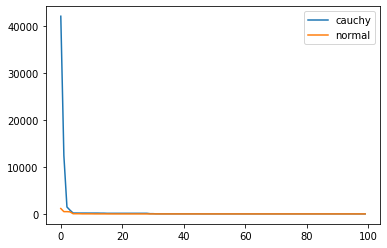

In [11]:
analyze_function('bent_cigar', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
Evolution ends in  149  epoch reaching error  0.0002537776792337354
epoch: 1	 result: 0.0002537776792337354
epoch: 2	 result: 0.0018033327577029468
run normal
Evolution ends in  32  epoch reaching error  0.00021696936747162
epoch: 1	 result: 0.00021696936747162
Evolution ends in  193  epoch reaching error  0.0008766561487334457
epoch: 2	 result: 0.0008766561487334457
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
             cauchy       normal
------  -----------  -----------
min     0.000253778  0.000216969
max     0.00180333   0.000876656
mean    0.00102856   0.000546813
median  0.00102856   0.000546813
std     0.000774778  0.000329843
Population
target individual [-27.96916335   2.2715327 ]
                          cauchy                       normal
------------------------  ---------------------------  ---------------------------
average individual        [-27.97448069   2.25219166]  [-27.98747

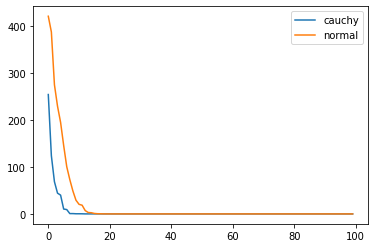

In [12]:
analyze_function('zakharov', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 0.01976472951582764
epoch: 2	 result: 0.019764679015111142
run normal
epoch: 1	 result: 0.019764540117364504
epoch: 2	 result: 0.019764540566825417
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
             cauchy      normal
------  -----------  ----------
min     0.0197647    0.0197645
max     0.0197647    0.0197645
mean    0.0197647    0.0197645
median  0.0197647    0.0197645
std     2.52504e-08  2.2473e-10
Population
target individual [16.25536251  3.87765641]
                          cauchy                     normal
------------------------  -------------------------  -------------------------
average individual        [50.         47.75791086]  [50.         47.75460415]
best individual           [50.         47.75766867]  [50.         47.75456464]
average individual error  55.35501143071662          55.35239021602529
best individual error     55.35481944718746          55.352

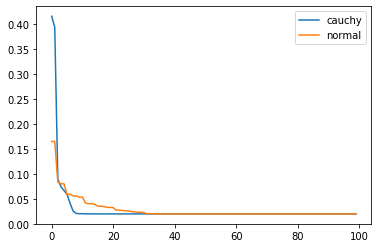

In [13]:
analyze_function('rosenbrock', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 0.6157767160601679
epoch: 2	 result: 0.10868047995836605
run normal
epoch: 1	 result: 0.1148417706764917
epoch: 2	 result: 0.030354598149415324
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
          cauchy     normal
------  --------  ---------
min     0.10868   0.0303546
max     0.615777  0.114842
mean    0.362229  0.0725982
median  0.362229  0.0725982
std     0.253548  0.0422436
Population
target individual [-8.70422518 28.08735165]
                          cauchy                     normal
------------------------  -------------------------  -------------------------
average individual        [-8.6953613  28.06541789]  [-8.6926762  28.08975089]
best individual           [-8.72701366 28.08193468]  [-8.69907068 28.07610506]
average individual error  0.039640254003804          0.018221259207394064
best individual error     0.023423455893381965       0.01237153054441014


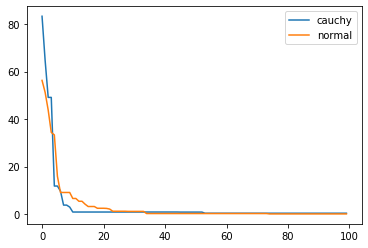

In [14]:
analyze_function('rastrigin', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 0.009716223581619943
Evolution ends in  89  epoch reaching error  7.743510036561929e-05
epoch: 2	 result: 7.743510036561929e-05
run normal
epoch: 1	 result: 0.009716068020736657
epoch: 2	 result: 0.009715969301225869
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
             cauchy       normal
------  -----------  -----------
min     7.74351e-05  0.00971597
max     0.00971622   0.00971607
mean    0.00489683   0.00971602
median  0.00489683   0.00971602
std     0.00481939   4.93598e-08
Population
target individual [ 39.54469647 -12.28638882]
                          cauchy                       normal
------------------------  ---------------------------  ---------------------------
average individual        [ 38.07577851 -12.82735716]  [ 37.50161376 -14.24061205]
best individual           [ 39.55151687 -12.28083528]  [ 38.4436613  -15.22497508]
average individual error  1.5739227960

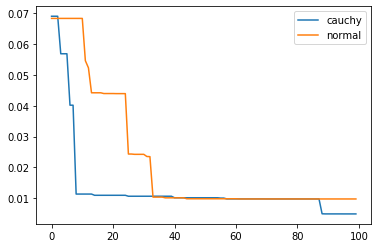

In [15]:
analyze_function('expanded_shaffer_f6', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 9846.246563507037
epoch: 2	 result: 54.07488058812521
run normal
epoch: 1	 result: 6756.037668827132
epoch: 2	 result: 0.7188970709162277
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
           cauchy       normal
------  ---------  -----------
min       54.0749     0.718897
max     9846.25    6756.04
mean    4950.16    3378.38
median  4950.16    3378.38
std     4896.09    3377.66
Population
target individual [-12.42812714   0.46712661]
                          cauchy                     normal
------------------------  -------------------------  ---------------------------
average individual        [45.28331132 -1.11428661]  [39.98311246  9.14374748]
best individual           [46.38983151 46.04500534]  [ 43.88964773 -30.04839225]
average individual error  74.55409800285909          66.10080462211653
best individual error     74.41031709140452          64.05379503317829


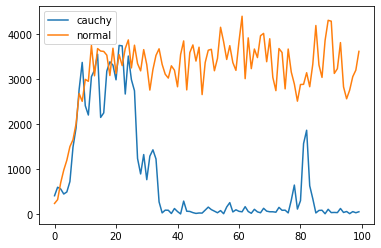

In [16]:
analyze_function('levy', dims=2, population_size=50, runs=2, max_iterations = 100)

run cauchy
epoch: 1	 result: 767.1756189757516
epoch: 2	 result: 767.1756189757516
run normal
epoch: 1	 result: 767.1756189757516
epoch: 2	 result: 767.1756189757516
Summary
---------------  ---
population size   50
runs               2
max_iterations   100
---------------  ---
Results
          cauchy    normal
------  --------  --------
min      767.176   767.176
max      767.176   767.176
mean     767.176   767.176
median   767.176   767.176
std        0         0
Population
target individual [-10.93575677 -37.2641027 ]
                          cauchy             normal
------------------------  -----------------  -----------------
average individual        [-50.  50.]        [-50.  50.]
best individual           [-50.  50.]        [-50.  50.]
average individual error  95.60877950358764  95.60877950358764
best individual error     95.60877950358764  95.60877950358764


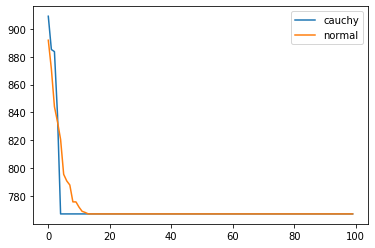

In [17]:
analyze_function('schwefel', dims=2, population_size=50, runs=2, max_iterations = 100)